In [2]:
import glob
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [161]:
path = os.getcwd()
data_files = glob.glob(os.path.join(path, "results/binary*"))

li = []
for filename in data_files:
    df = pd.read_csv(filename)
    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)

In [162]:
data = data[data['mean_performance'].notna()]
data

,model,main_metric,sample_size,feature_selector,feature_selection_frac,validation_type,train_size,cv_split_size,par_split_size,mean_performance,median_performance,max_performance,min_performance,lower_bound_confidence_interval,upper_bound_confidence_interval,performance_variance
0,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,2,[0.655 0.647 0.64 0.67 0.655],[0.636 0.658 0.636 0.731 0.636],[0.909 0.917 0.909 0.924 0.909],[0.091 0.083 0.091 0.091 0.091],[0.614 0.606 0.596 0.622 0.614],[0.695 0.688 0.683 0.718 0.695],[0.02 0.021 0.023 0.028 0.02 ]
1,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.8,NaN,2,[0.71 0.71 0.697 0.744 0.71 ],[0.75 0.75 0.748 0.837 0.75 ],[1. 1. 1. 1. 1.],[0.167 0.167 0.143 0.125 0.167],[0.654 0.654 0.638 0.682 0.654],[0.766 0.766 0.756 0.806 0.766],[0.039 0.039 0.042 0.046 0.039]
2,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.9,NaN,2,[0.76 0.76 0.731 0.759 0.76 ],[0.667 0.75 0.667 0.833 0.667],[1. 1. 1. 1. 1.],[0.333 0.25 0.167 0.111 0.333],[0.691 0.687 0.654 0.676 0.691],[0.829 0.833 0.809 0.842 0.829],[0.058 0.065 0.073 0.084 0.058]
3,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,7,[0.68 0.671 0.665 0.692 0.68 ],[0.727 0.708 0.709 0.735 0.727],[0.909 0.917 0.909 0.924 0.909],[0.273 0.267 0.273 0.273 0.273],[0.634 0.624 0.616 0.639 0.634],[0.726 0.717 0.714 0.745 0.726],[0.026 0.026 0.029 0.034 0.026]
4,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.8,NaN,7,[0.627 0.627 0.601 0.621 0.627],[0.667 0.667 0.625 0.667 0.667],[1. 1. 1. 1. 1.],[0.167 0.167 0.143 0.125 0.167],[0.57 0.57 0.538 0.549 0.57 ],[0.684 0.684 0.664 0.692 0.684],[0.04 0.04 0.048 0.061 0.04 ]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10615,svm,recall,1.00,rfe,1.0,all_nested,NaN,7.0,13,[0.653 0.642 0.648 0.651 0.653],[0.653 0.642 0.648 0.652 0.653],[0.667 0.657 0.663 0.668 0.667],[0.629 0.618 0.625 0.626 0.629],[0.65 0.639 0.645 0.648 0.65 ],[0.655 0.645 0.651 0.654 0.655],[0. 0. 0. 0. 0.]
10616,svm,recall,1.00,rfe,1.0,all_nested,NaN,13.0,13,[0.654 0.643 0.649 0.654 0.654],[0.654 0.644 0.649 0.654 0.654],[0.671 0.66 0.665 0.673 0.671],[0.64 0.63 0.635 0.64 0.64 ],[0.652 0.641 0.647 0.652 0.652],[0.656 0.645 0.651 0.656 0.656],[0. 0. 0. 0. 0.]
10617,svm,recall,1.00,rfe,1.0,all_kfold,NaN,NaN,2,[0.637 0.623 0.63 0.75 0.637],[0.638 0.625 0.632 0.754 0.638],[0.664 0.652 0.658 0.758 0.664],[0.597 0.584 0.591 0.643 0.597],[0.632 0.619 0.626 0.744 0.632],[0.641 0.628 0.635 0.755 0.641],[0. 0. 0. 0. 0.]
10618,svm,recall,1.00,rfe,1.0,all_kfold,NaN,NaN,7,[0.656 0.645 0.651 0.703 0.656],[0.657 0.645 0.652 0.71 0.657],[0.678 0.667 0.673 0.758 0.678],[0.64 0.627 0.633 0.657 0.64 ],[0.654 0.643 0.649 0.695 0.654],[0.659 0.648 0.654 0.711 0.659],[0. 0. 0. 0.001 0. ]


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10380 entries, 0 to 10619
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   model                            10380 non-null  object 
 1   main_metric                      10380 non-null  object 
 2   sample_size                      10380 non-null  float64
 3   feature_selector                 10380 non-null  object 
 4   feature_selection_frac           10380 non-null  float64
 5   validation_type                  10380 non-null  object 
 6   train_size                       2640 non-null   float64
 7   cv_split_size                    6840 non-null   float64
 8   par_split_size                   10380 non-null  int64  
 9   mean_performance                 10380 non-null  object 
 10  median_performance               10380 non-null  object 
 11  max_performance                  10380 non-null  object 
 12  min_performance   

In [22]:
metrics = ['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall']
performances = ['mean_performance', 'median_performance', 'max_performance', 'min_performance', 'lower_bound_confidence_interval', 'upper_bound_confidence_interval', 'performance_variance']

In [164]:
def clean_alt_list(list_):
    list_ = list_.replace('    ', ',')
    list_ = list_.replace('   ', ',')
    list_ = list_.replace('  ', ',')
    list_ = list_.replace(' ', ',')
    list_ = list_.replace(',]', ']')
    list_ = list_.replace(',', '","')
    list_ = list_.replace('[', '["')
    list_ = list_.replace(']', '"]')
    return list_

#data_wide = data.explode([performance for performance in performances])
#data_wide

for performance in performances:
   data[performance] = data[performance].apply(clean_alt_list)
   data[performance] = data[performance].apply(eval)
data[['test', 'test2']] = 0
data


,model,main_metric,sample_size,feature_selector,feature_selection_frac,validation_type,train_size,cv_split_size,par_split_size,mean_performance,median_performance,max_performance,min_performance,lower_bound_confidence_interval,upper_bound_confidence_interval,performance_variance,test,test2
0,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,2,"[0.655, 0.647, 0.64, 0.67, 0.655]","[0.636, 0.658, 0.636, 0.731, 0.636]","[0.909, 0.917, 0.909, 0.924, 0.909]","[0.091, 0.083, 0.091, 0.091, 0.091]","[0.614, 0.606, 0.596, 0.622, 0.614]","[0.695, 0.688, 0.683, 0.718, 0.695]","[0.02, 0.021, 0.023, 0.028, 0.02]",0,0
1,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.8,NaN,2,"[0.71, 0.71, 0.697, 0.744, 0.71]","[0.75, 0.75, 0.748, 0.837, 0.75]","[1., 1., 1., 1., 1.]","[0.167, 0.167, 0.143, 0.125, 0.167]","[0.654, 0.654, 0.638, 0.682, 0.654]","[0.766, 0.766, 0.756, 0.806, 0.766]","[0.039, 0.039, 0.042, 0.046, 0.039]",0,0
2,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.9,NaN,2,"[0.76, 0.76, 0.731, 0.759, 0.76]","[0.667, 0.75, 0.667, 0.833, 0.667]","[1., 1., 1., 1., 1.]","[0.333, 0.25, 0.167, 0.111, 0.333]","[0.691, 0.687, 0.654, 0.676, 0.691]","[0.829, 0.833, 0.809, 0.842, 0.829]","[0.058, 0.065, 0.073, 0.084, 0.058]",0,0
3,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,7,"[0.68, 0.671, 0.665, 0.692, 0.68]","[0.727, 0.708, 0.709, 0.735, 0.727]","[0.909, 0.917, 0.909, 0.924, 0.909]","[0.273, 0.267, 0.273, 0.273, 0.273]","[0.634, 0.624, 0.616, 0.639, 0.634]","[0.726, 0.717, 0.714, 0.745, 0.726]","[0.026, 0.026, 0.029, 0.034, 0.026]",0,0
4,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.8,NaN,7,"[0.627, 0.627, 0.601, 0.621, 0.627]","[0.667, 0.667, 0.625, 0.667, 0.667]","[1., 1., 1., 1., 1.]","[0.167, 0.167, 0.143, 0.125, 0.167]","[0.57, 0.57, 0.538, 0.549, 0.57]","[0.684, 0.684, 0.664, 0.692, 0.684]","[0.04, 0.04, 0.048, 0.061, 0.04]",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10615,svm,recall,1.00,rfe,1.0,all_nested,NaN,7.0,13,"[0.653, 0.642, 0.648, 0.651, 0.653]","[0.653, 0.642, 0.648, 0.652, 0.653]","[0.667, 0.657, 0.663, 0.668, 0.667]","[0.629, 0.618, 0.625, 0.626, 0.629]","[0.65, 0.639, 0.645, 0.648, 0.65]","[0.655, 0.645, 0.651, 0.654, 0.655]","[0., 0., 0., 0., 0.]",0,0
10616,svm,recall,1.00,rfe,1.0,all_nested,NaN,13.0,13,"[0.654, 0.643, 0.649, 0.654, 0.654]","[0.654, 0.644, 0.649, 0.654, 0.654]","[0.671, 0.66, 0.665, 0.673, 0.671]","[0.64, 0.63, 0.635, 0.64, 0.64]","[0.652, 0.641, 0.647, 0.652, 0.652]","[0.656, 0.645, 0.651, 0.656, 0.656]","[0., 0., 0., 0., 0.]",0,0
10617,svm,recall,1.00,rfe,1.0,all_kfold,NaN,NaN,2,"[0.637, 0.623, 0.63, 0.75, 0.637]","[0.638, 0.625, 0.632, 0.754, 0.638]","[0.664, 0.652, 0.658, 0.758, 0.664]","[0.597, 0.584, 0.591, 0.643, 0.597]","[0.632, 0.619, 0.626, 0.744, 0.632]","[0.641, 0.628, 0.635, 0.755, 0.641]","[0., 0., 0., 0., 0.]",0,0
10618,svm,recall,1.00,rfe,1.0,all_kfold,NaN,NaN,7,"[0.656, 0.645, 0.651, 0.703, 0.656]","[0.657, 0.645, 0.652, 0.71, 0.657]","[0.678, 0.667, 0.673, 0.758, 0.678]","[0.64, 0.627, 0.633, 0.657, 0.64]","[0.654, 0.643, 0.649, 0.695, 0.654]","[0.659, 0.648, 0.654, 0.711, 0.659]","[0., 0., 0., 0.001, 0.]",0,0


In [157]:
liste = []

for performance in performances:
    data_wide = data[performance].apply(pd.Series)
    data_wide.rename({0: performance + '_' + 'accuracy',
                      1: performance + '_' + 'balanced_accuracy',
                      2: performance + '_' + 'f1',
                      3: performance + '_' + 'precision',
                      4: performance + '_' + 'recall',}, axis=1, inplace=True)
    liste.append(data_wide)

res = pd.concat(liste, axis=1)
res = res.astype(float)

data_new = pd.concat([data.drop(performances, axis=1), res], axis=1)
res

,mean_performance_accuracy,mean_performance_balanced_accuracy,mean_performance_f1,mean_performance_precision,mean_performance_recall,median_performance_accuracy,median_performance_balanced_accuracy,median_performance_f1,median_performance_precision,median_performance_recall,...,upper_bound_confidence_interval_accuracy,upper_bound_confidence_interval_balanced_accuracy,upper_bound_confidence_interval_f1,upper_bound_confidence_interval_precision,upper_bound_confidence_interval_recall,performance_variance_accuracy,performance_variance_balanced_accuracy,performance_variance_f1,performance_variance_precision,performance_variance_recall
0,0.655,0.647,0.640,0.670,0.655,0.636,0.658,0.636,0.731,0.636,...,0.695,0.688,0.683,0.718,0.695,0.020,0.021,0.023,0.028,0.020
1,0.710,0.710,0.697,0.744,0.710,0.750,0.750,0.748,0.837,0.750,...,0.766,0.766,0.756,0.806,0.766,0.039,0.039,0.042,0.046,0.039
2,0.760,0.760,0.731,0.759,0.760,0.667,0.750,0.667,0.833,0.667,...,0.829,0.833,0.809,0.842,0.829,0.058,0.065,0.073,0.084,0.058
3,0.680,0.671,0.665,0.692,0.680,0.727,0.708,0.709,0.735,0.727,...,0.726,0.717,0.714,0.745,0.726,0.026,0.026,0.029,0.034,0.026
4,0.627,0.627,0.601,0.621,0.627,0.667,0.667,0.625,0.667,0.667,...,0.684,0.684,0.664,0.692,0.684,0.040,0.040,0.048,0.061,0.040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10615,0.653,0.642,0.648,0.651,0.653,0.653,0.642,0.648,0.652,0.653,...,0.655,0.645,0.651,0.654,0.655,0.000,0.000,0.000,0.000,0.000
10616,0.654,0.643,0.649,0.654,0.654,0.654,0.644,0.649,0.654,0.654,...,0.656,0.645,0.651,0.656,0.656,0.000,0.000,0.000,0.000,0.000
10617,0.637,0.623,0.630,0.750,0.637,0.638,0.625,0.632,0.754,0.638,...,0.641,0.628,0.635,0.755,0.641,0.000,0.000,0.000,0.000,0.000
10618,0.656,0.645,0.651,0.703,0.656,0.657,0.645,0.652,0.710,0.657,...,0.659,0.648,0.654,0.711,0.659,0.000,0.000,0.000,0.001,0.000


In [158]:
select = data_new[(data_new['model'] == 'logistic_regression') & (data_new['main_metric'] == 'accuracy') & (data_new['feature_selection_frac'] == 1.0) & ((data_new['train_size'] == 0.9) | data_new['train_size'].isna()) & (data_new['par_split_size'] == 13.0) & ((data_new['cv_split_size'] == 13.0) | data_new['cv_split_size'].isna())]
select

,model,main_metric,sample_size,feature_selector,feature_selection_frac,validation_type,train_size,cv_split_size,par_split_size,mean_performance_accuracy,...,upper_bound_confidence_interval_accuracy,upper_bound_confidence_interval_balanced_accuracy,upper_bound_confidence_interval_f1,upper_bound_confidence_interval_precision,upper_bound_confidence_interval_recall,performance_variance_accuracy,performance_variance_balanced_accuracy,performance_variance_f1,performance_variance_precision,performance_variance_recall
86,logistic_regression,accuracy,0.03,rfe,1.0,ts,0.9,NaN,13,0.727,...,0.805,0.810,0.779,0.810,0.805,0.074,0.077,0.091,0.106,0.074
95,logistic_regression,accuracy,0.03,rfe,1.0,all_nested,NaN,13.0,13,0.723,...,0.755,0.755,0.706,0.692,0.755,0.013,0.012,0.017,0.020,0.013
98,logistic_regression,accuracy,0.03,rfe,1.0,all_kfold,NaN,NaN,13,0.769,...,0.795,0.795,0.751,0.738,0.795,0.008,0.008,0.010,0.011,0.008
107,logistic_regression,accuracy,0.03,rfe,1.0,fs_nested_pt_kfold,NaN,13.0,13,0.772,...,0.798,0.797,0.755,0.740,0.798,0.008,0.008,0.011,0.013,0.008
116,logistic_regression,accuracy,0.03,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.728,...,0.757,0.757,0.706,0.693,0.757,0.010,0.010,0.013,0.015,0.010
203,logistic_regression,accuracy,0.05,rfe,1.0,ts,0.9,NaN,13,0.728,...,0.786,0.785,0.776,0.817,0.786,0.041,0.042,0.048,0.056,0.041
212,logistic_regression,accuracy,0.05,rfe,1.0,all_nested,NaN,13.0,13,0.749,...,0.771,0.771,0.751,0.785,0.771,0.006,0.006,0.007,0.007,0.006
215,logistic_regression,accuracy,0.05,rfe,1.0,all_kfold,NaN,NaN,13,0.778,...,0.797,0.798,0.778,0.816,0.797,0.004,0.004,0.005,0.005,0.004
224,logistic_regression,accuracy,0.05,rfe,1.0,fs_nested_pt_kfold,NaN,13.0,13,0.753,...,0.771,0.767,0.750,0.786,0.771,0.004,0.004,0.005,0.005,0.004
233,logistic_regression,accuracy,0.05,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.726,...,0.747,0.745,0.721,0.753,0.747,0.006,0.006,0.006,0.008,0.006


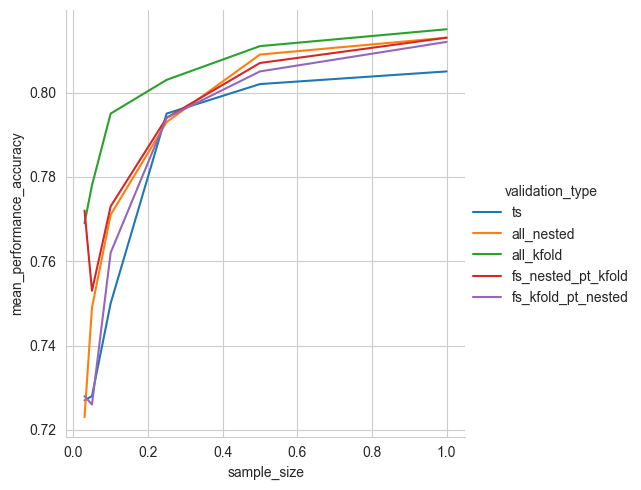

In [159]:
sns.relplot(x='sample_size', data=select, hue='validation_type', y='mean_performance_accuracy', kind="line",)
plt.show()

In [20]:
data[['mean_performance_' + metric for metric in metrics]] = pd.DataFrame(data.mean_performance.to_numpy().tolist(), index= data.index)

ValueError: Columns must be same length as key

In [19]:
data.mean_performance.to_numpy().tolist()

['[0.655 0.647 0.64  0.67  0.655]',
 '[0.71  0.71  0.697 0.744 0.71 ]',
 '[0.76  0.76  0.731 0.759 0.76 ]',
 '[0.68  0.671 0.665 0.692 0.68 ]',
 '[0.627 0.627 0.601 0.621 0.627]',
 '[0.66  0.64  0.619 0.65  0.66 ]',
 '[0.673 0.675 0.639 0.673 0.673]',
 '[0.66  0.65  0.645 0.665 0.66 ]',
 '[0.674 0.669 0.645 0.675 0.674]',
 '[0.714 0.712 0.651 0.625 0.714]',
 '[0.675 0.669 0.663 0.696 0.675]',
 '[0.69  0.687 0.665 0.701 0.69 ]',
 '[0.718 0.716 0.659 0.638 0.718]',
 '[0.702 0.699 0.642 0.619 0.702]',
 '[0.791 0.788 0.787 0.816 0.791]',
 '[0.804 0.804 0.792 0.835 0.804]',
 '[0.821 0.82  0.78  0.769 0.821]',
 '[0.698 0.691 0.684 0.709 0.698]',
 '[0.716 0.707 0.687 0.716 0.716]',
 '[0.701 0.7   0.637 0.616 0.701]',
 '[0.666 0.656 0.65  0.686 0.666]',
 '[0.714 0.706 0.685 0.72  0.714]',
 '[0.735 0.736 0.677 0.659 0.735]',
 '[0.652 0.642 0.634 0.655 0.652]',
 '[0.722 0.71  0.693 0.721 0.722]',
 '[0.717 0.716 0.663 0.647 0.717]',
 '[0.721 0.712 0.703 0.733 0.721]',
 '[0.77  0.765 0.741 0.771 0

In [110]:
path = os.getcwd()
data_files = glob.glob(os.path.join(path, "subgroups/binary*"))

li = []
for filename in data_files:
    df = pd.read_csv(filename)
    li.append(df)


subgroup_df = pd.concat(li, axis=0, ignore_index=True)
new_names = dict([(i,'metric_'+ i) for i in subgroup_df.iloc[0:1,10:].columns.values])
subgroup_df.rename(columns=new_names, inplace=True)

subgroup_df = subgroup_df[subgroup_df['metric_accuracy'].notna()]
subgroup_df

,subgroup,model,main_metric,sample_size,feature_selector,feature_selection_frac,validation_type,train_size,cv_split_size,par_split_size,metric_accuracy,metric_balanced_accuracy,metric_f1,metric_precision,metric_recall
0,young,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,2,0.250000,0.250000,0.200000,0.166667,0.250000
1,young,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,2,0.250000,0.166667,0.300000,0.375000,0.250000
2,young,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,2,0.250000,0.250000,0.200000,0.166667,0.250000
3,young,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,2,0.250000,0.500000,0.100000,0.062500,0.250000
4,young,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,2,0.750000,0.750000,0.733333,0.833333,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191668,elder,logistic_regression,accuracy,1.00,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.795330,0.735897,0.787244,0.809753,0.795330
191669,elder,logistic_regression,accuracy,1.00,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.815934,0.764103,0.796866,0.798764,0.815934
191670,elder,logistic_regression,accuracy,1.00,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.788462,0.712821,0.777793,0.795215,0.788462
191671,elder,logistic_regression,accuracy,1.00,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.806319,0.742308,0.797313,0.835188,0.806319


In [13]:
select_subgroup = subgroup_df[(subgroup_df['subgroup'] == 'young') & (subgroup_df['model'] == 'logistic_regression') & (subgroup_df['main_metric'] == 'accuracy') & (subgroup_df['feature_selection_frac'] == 1.0) & ((subgroup_df['train_size'] == 0.9) | subgroup_df['train_size'].isna()) & (subgroup_df['par_split_size'] == 13.0) & ((subgroup_df['cv_split_size'] == 13.0) | subgroup_df['cv_split_size'].isna())]
select_subgroup

,subgroup,model,main_metric,sample_size,feature_selector,feature_selection_frac,validation_type,train_size,cv_split_size,par_split_size,accuracy,balanced_accuracy,f1,precision,recall
19247,young,logistic_regression,accuracy,0.1,rfe,1.0,ts,0.9,NaN,13,1.000000,1.000000,1.000000,1.000000,1.000000
19248,young,logistic_regression,accuracy,0.1,rfe,1.0,ts,0.9,NaN,13,1.000000,1.000000,1.000000,1.000000,1.000000
19249,young,logistic_regression,accuracy,0.1,rfe,1.0,ts,0.9,NaN,13,1.000000,1.000000,1.000000,1.000000,1.000000
19250,young,logistic_regression,accuracy,0.1,rfe,1.0,ts,0.9,NaN,13,0.666667,0.750000,0.666667,0.833333,0.666667
19251,young,logistic_regression,accuracy,0.1,rfe,1.0,ts,0.9,NaN,13,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65944,young,logistic_regression,accuracy,1.0,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.821374,0.802174,0.818123,0.828160,0.821374
65945,young,logistic_regression,accuracy,1.0,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.818334,0.800953,0.814947,0.827987,0.818334
65946,young,logistic_regression,accuracy,1.0,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.821830,0.802996,0.817688,0.823744,0.821830
65947,young,logistic_regression,accuracy,1.0,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.829583,0.811297,0.826097,0.834188,0.829583


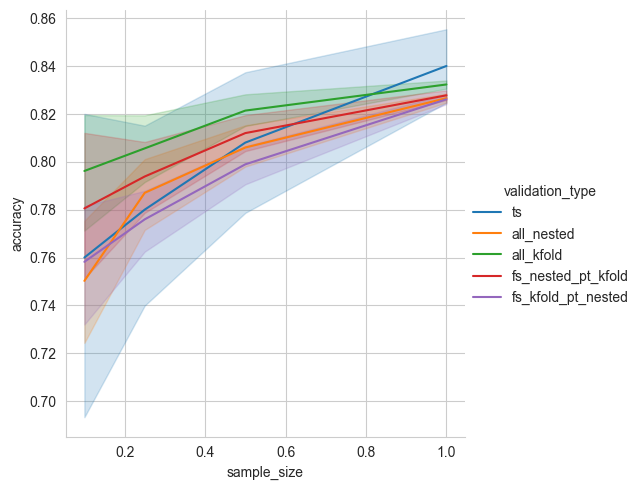

In [14]:
sns.relplot(x='sample_size', data=select_subgroup, hue='validation_type', y='accuracy', kind="line", ci=95)
plt.show()

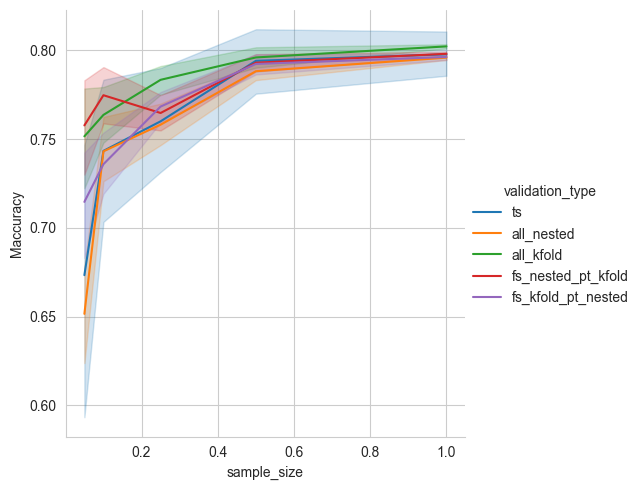

In [68]:
select_subgroup = subgroup_df[(subgroup_df['subgroup'] == 'middle') & (subgroup_df['model'] == 'logistic_regression') & (subgroup_df['main_metric'] == 'accuracy') & (subgroup_df['feature_selection_frac'] == 1.0) & ((subgroup_df['train_size'] == 0.9) | subgroup_df['train_size'].isna()) & (subgroup_df['par_split_size'] == 13.0) & ((subgroup_df['cv_split_size'] == 13.0) | subgroup_df['cv_split_size'].isna())]

sns.relplot(x='sample_size', data=select_subgroup, hue='validation_type', y='accuracy', kind="line", ci=95)
plt.show()

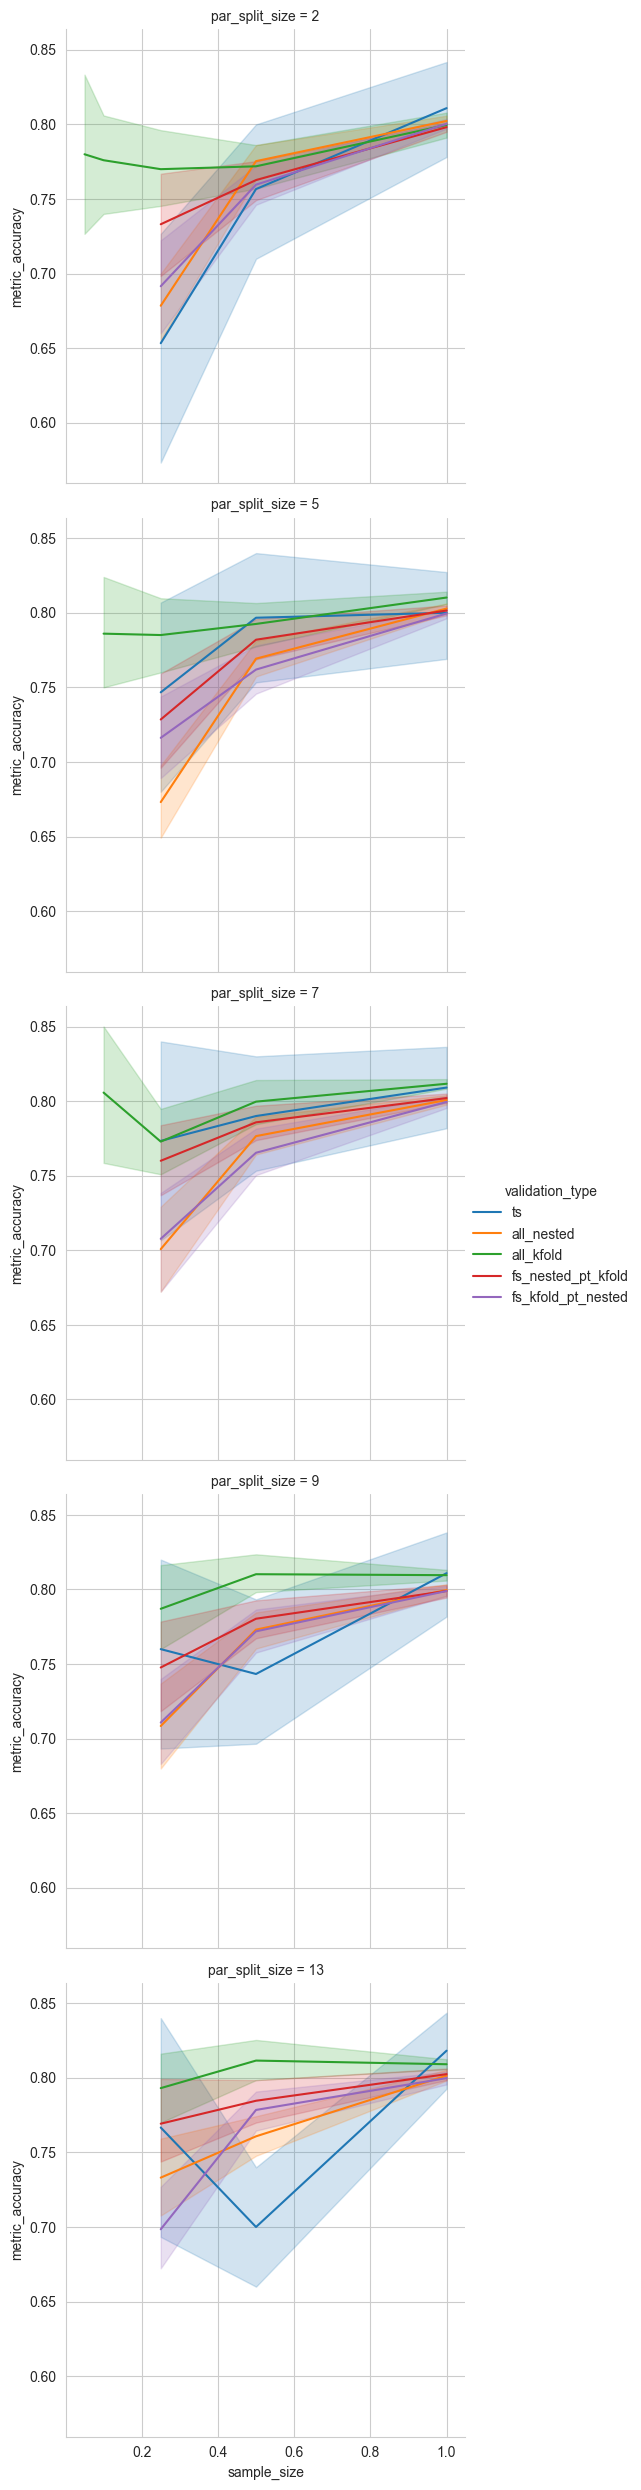

In [111]:
select_subgroup = subgroup_df[(subgroup_df['subgroup'] == 'elder') & (subgroup_df['model'] == 'logistic_regression') & (subgroup_df['feature_selection_frac'] == 1.0) & ((subgroup_df['train_size'] == 0.9) | subgroup_df['train_size'].isna()) & ((subgroup_df['cv_split_size'] == 13.0) | subgroup_df['cv_split_size'].isna())]

sns.relplot(x='sample_size', data=select_subgroup, hue='validation_type', kind='line', y='metric_accuracy',  ci=95, row='par_split_size')
plt.show()

In [112]:
select_subgroup = select_subgroup.reset_index()

In [113]:
select_subgroup

,index,subgroup,model,main_metric,sample_size,feature_selector,feature_selection_frac,validation_type,train_size,cv_split_size,par_split_size,metric_accuracy,metric_balanced_accuracy,metric_f1,metric_precision,metric_recall
0,144095,elder,logistic_regression,accuracy,0.03,rfe,1.0,ts,0.9,NaN,2,NaN,NaN,NaN,NaN,NaN
1,144098,elder,logistic_regression,accuracy,0.03,rfe,1.0,ts,0.9,NaN,5,NaN,NaN,NaN,NaN,NaN
2,144101,elder,logistic_regression,accuracy,0.03,rfe,1.0,ts,0.9,NaN,7,NaN,NaN,NaN,NaN,NaN
3,144104,elder,logistic_regression,accuracy,0.03,rfe,1.0,ts,0.9,NaN,9,NaN,NaN,NaN,NaN,NaN
4,144107,elder,logistic_regression,accuracy,0.03,rfe,1.0,ts,0.9,NaN,13,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,191668,elder,logistic_regression,accuracy,1.00,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.795330,0.735897,0.787244,0.809753,0.795330
4066,191669,elder,logistic_regression,accuracy,1.00,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.815934,0.764103,0.796866,0.798764,0.815934
4067,191670,elder,logistic_regression,accuracy,1.00,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.788462,0.712821,0.777793,0.795215,0.788462
4068,191671,elder,logistic_regression,accuracy,1.00,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.806319,0.742308,0.797313,0.835188,0.806319


In [114]:
pivoted_subgroup = pd.wide_to_long(select_subgroup, stubnames='metric', i='index', j='metric_type', sep='_', suffix=r'\w+')
pivoted_subgroup.reset_index(inplace=True)
pivoted_subgroup = pivoted_subgroup.drop('index', axis=1)
pivoted_subgroup.rename(columns={'metric': 'metric_measurement'}, inplace=True)
pivoted_subgroup

,metric_type,feature_selector,par_split_size,sample_size,validation_type,train_size,feature_selection_frac,subgroup,main_metric,cv_split_size,model,metric_measurement
0,accuracy,rfe,2,0.03,ts,0.9,1.0,elder,accuracy,NaN,logistic_regression,NaN
1,accuracy,rfe,5,0.03,ts,0.9,1.0,elder,accuracy,NaN,logistic_regression,NaN
2,accuracy,rfe,7,0.03,ts,0.9,1.0,elder,accuracy,NaN,logistic_regression,NaN
3,accuracy,rfe,9,0.03,ts,0.9,1.0,elder,accuracy,NaN,logistic_regression,NaN
4,accuracy,rfe,13,0.03,ts,0.9,1.0,elder,accuracy,NaN,logistic_regression,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
20345,recall,rfe,13,1.00,fs_kfold_pt_nested,NaN,1.0,elder,accuracy,13.0,logistic_regression,0.795330
20346,recall,rfe,13,1.00,fs_kfold_pt_nested,NaN,1.0,elder,accuracy,13.0,logistic_regression,0.815934
20347,recall,rfe,13,1.00,fs_kfold_pt_nested,NaN,1.0,elder,accuracy,13.0,logistic_regression,0.788462
20348,recall,rfe,13,1.00,fs_kfold_pt_nested,NaN,1.0,elder,accuracy,13.0,logistic_regression,0.806319


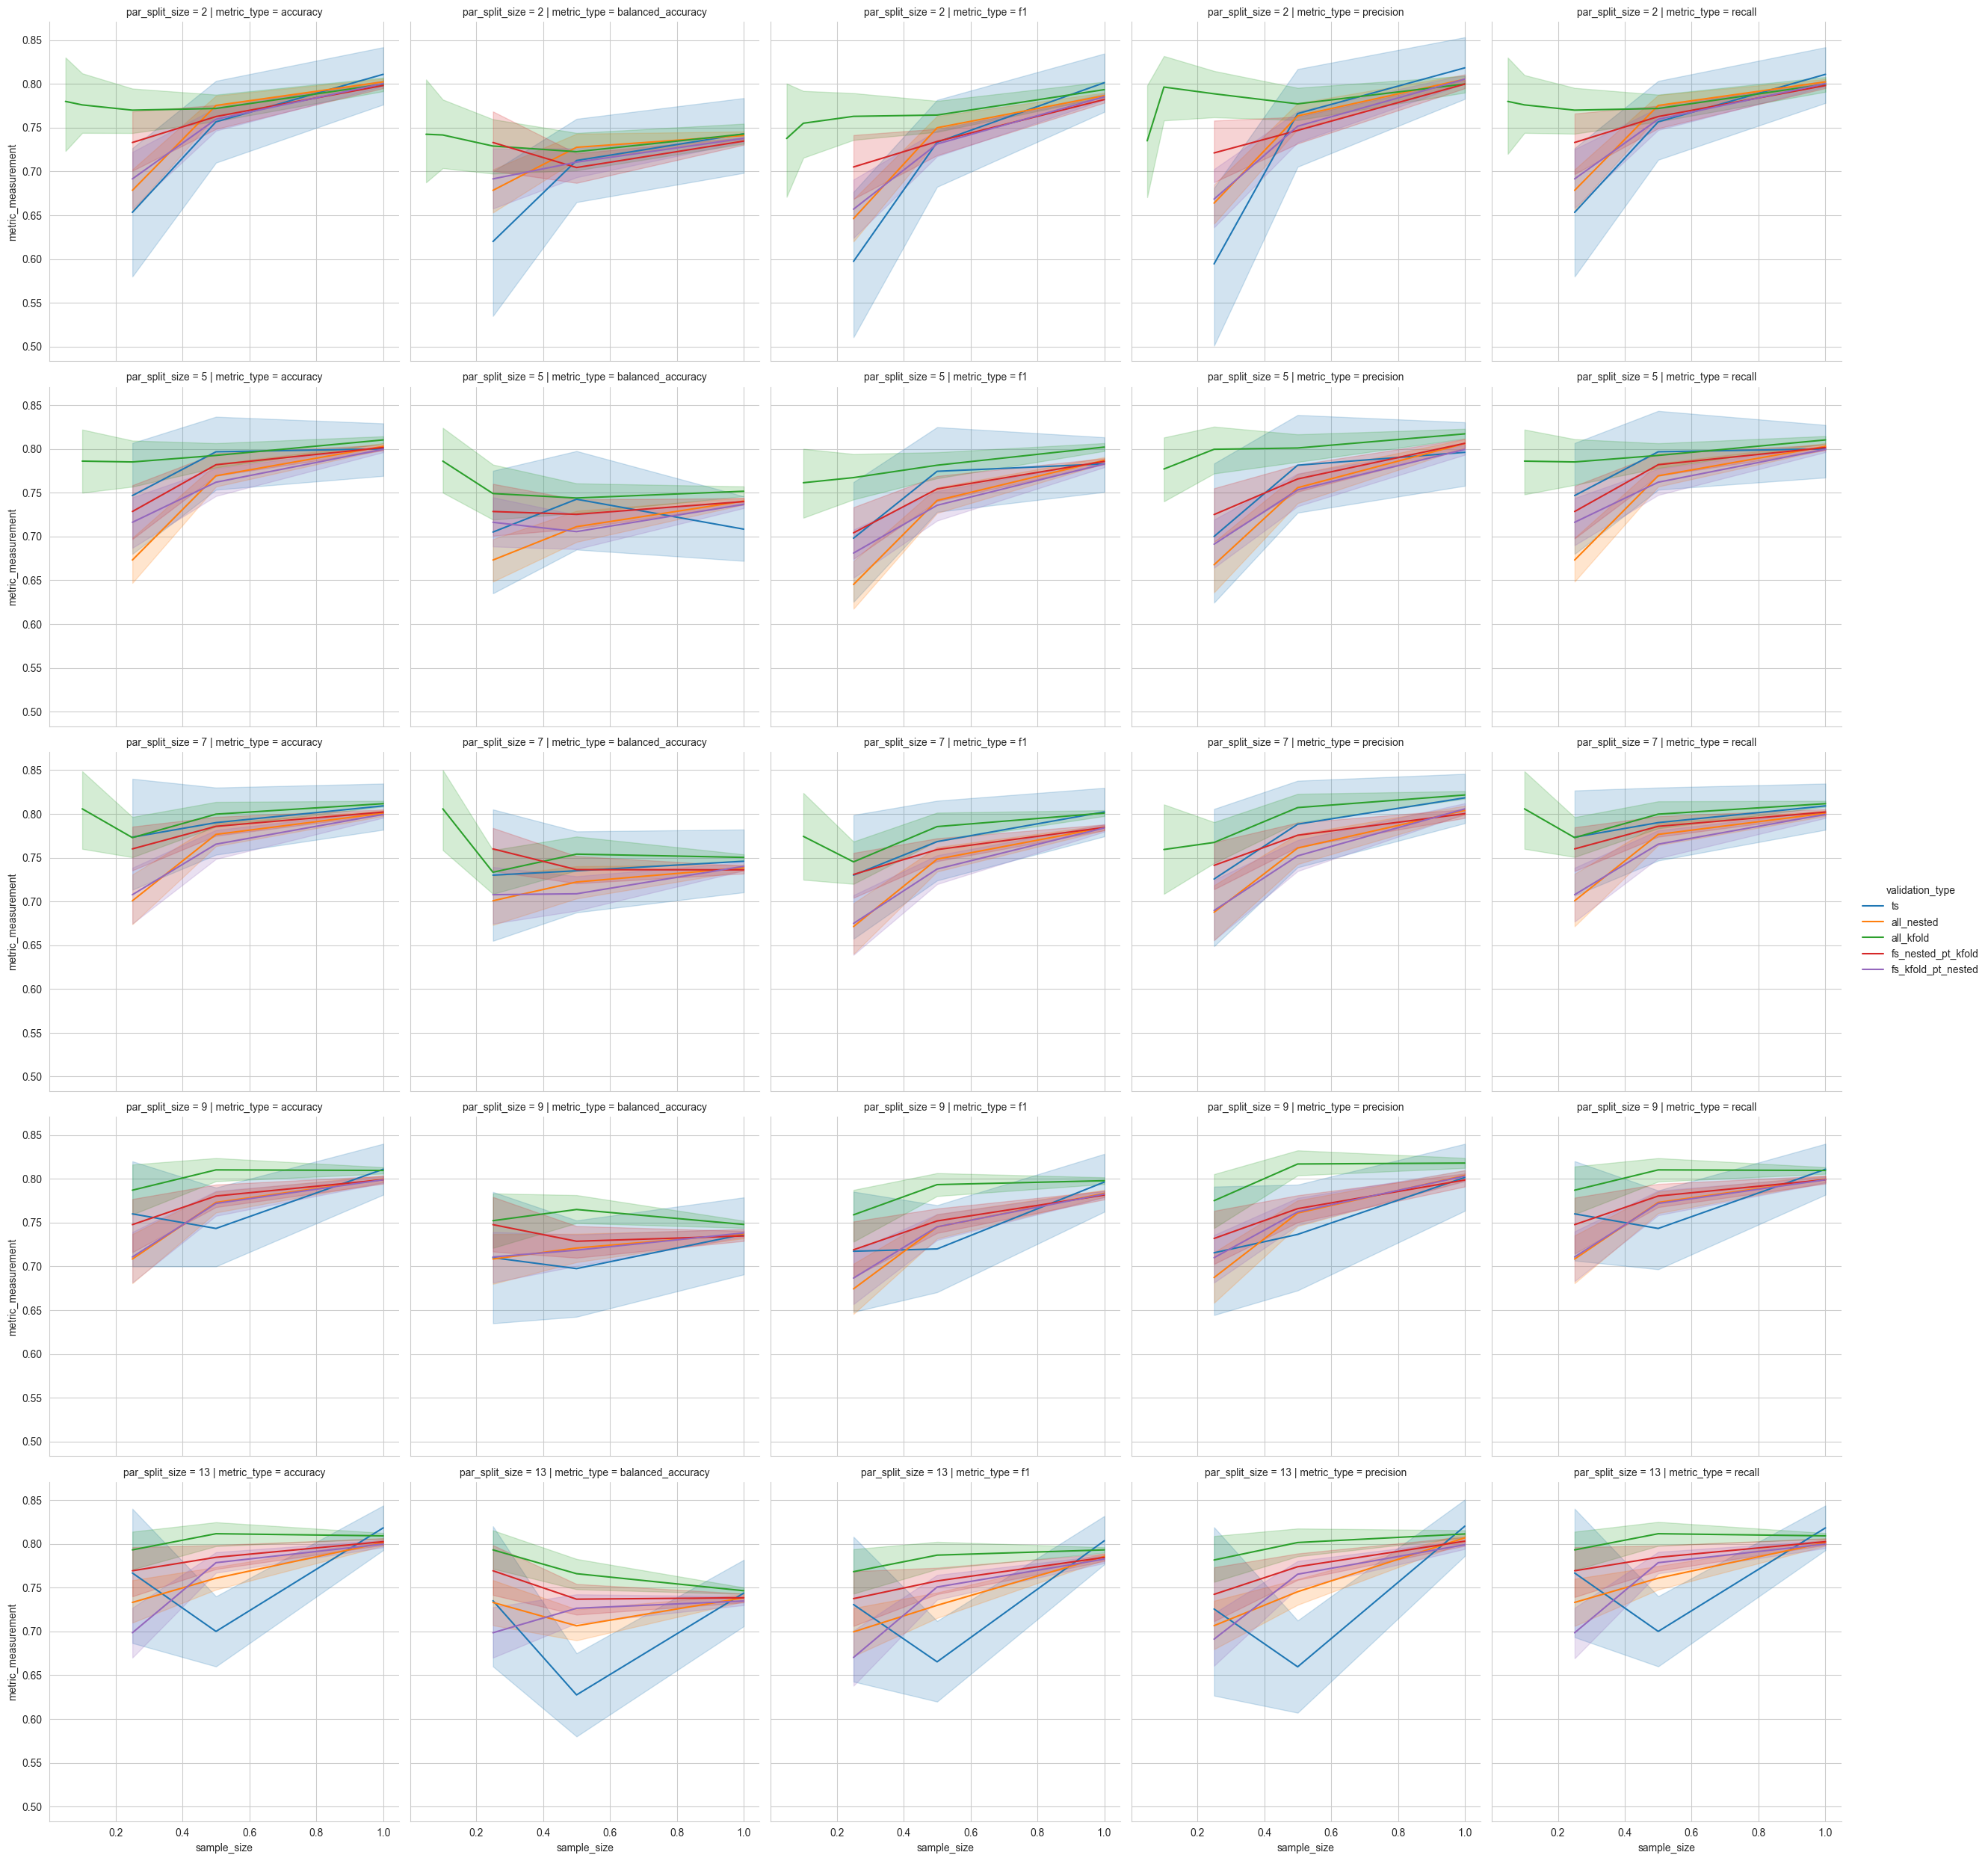

In [115]:
sns.relplot(x='sample_size', data=pivoted_subgroup, hue='validation_type', kind='line', y='metric_measurement',  ci=95, row='par_split_size', col='metric_type')
plt.show()

In [97]:
df = pd.DataFrame({
    'famid': [1, 1, 1, 2, 2, 2, 3, 3, 3],
    'birth': [1, 2, 3, 1, 2, 3, 1, 2, 3],
    'ht_one213_': [2.8, 2.9, 2.2, 2, 1.8, 1.9, 2.2, 2.3, 2.1],
    'ht_two2131_': [3.4, 3.8, 2.9, 3.2, 2.8, 2.4, 3.3, 3.4, 2.9]
})

l = pd.wide_to_long(df, stubnames='ht', i=['famid', 'birth'], j='age',
                    sep='_', suffix=r'\w+')
l

ht
famid birth age          
1     1     one213_   2.8
            two2131_  3.4
      2     one213_   2.9
            two2131_  3.8
      3     one213_   2.2
            two2131_  2.9
2     1     one213_   2.0
            two2131_  3.2
      2     one213_   1.8
            two2131_  2.8
      3     one213_   1.9
            two2131_  2.4
3     1     one213_   2.2
            two2131_  3.3
      2     one213_   2.3
            two2131_  3.4
      3     one213_   2.1
            two2131_  2.9

In [19]:
select_subgroup

,subgroup,model,main_metric,sample_size,feature_selector,feature_selection_frac,validation_type,train_size,cv_split_size,par_split_size,accuracy,balanced_accuracy,f1,precision,recall
159221,elder,logistic_regression,accuracy,0.25,rfe,1.0,ts,0.9,NaN,13,0.666667,0.750000,0.666667,0.833333,0.666667
159222,elder,logistic_regression,accuracy,0.25,rfe,1.0,ts,0.9,NaN,13,1.000000,1.000000,1.000000,1.000000,1.000000
159223,elder,logistic_regression,accuracy,0.25,rfe,1.0,ts,0.9,NaN,13,0.666667,0.500000,0.533333,0.444444,0.666667
159224,elder,logistic_regression,accuracy,0.25,rfe,1.0,ts,0.9,NaN,13,1.000000,1.000000,1.000000,1.000000,1.000000
159225,elder,logistic_regression,accuracy,0.25,rfe,1.0,ts,0.9,NaN,13,0.666667,0.750000,0.666667,0.833333,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191668,elder,logistic_regression,accuracy,1.00,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.795330,0.735897,0.787244,0.809753,0.795330
191669,elder,logistic_regression,accuracy,1.00,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.815934,0.764103,0.796866,0.798764,0.815934
191670,elder,logistic_regression,accuracy,1.00,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.788462,0.712821,0.777793,0.795215,0.788462
191671,elder,logistic_regression,accuracy,1.00,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.806319,0.742308,0.797313,0.835188,0.806319
